In [2]:
import os
import json
import cv2
import librosa
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import noisereduce as nr 
from warnings import filterwarnings
filterwarnings(action='ignore')

c:\Users\ledin\miniconda3\envs\dataminingmaster\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def audio_to_tensors(audio_file):
    # Extract the Signal and Sample_Rate from Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    return mfccs_tensors

In [3]:
audio_sample = './data/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3'
audio_to_tensors(audio_sample)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-302.7308    ,   70.47813   ,   13.989463  ,   28.275862  ,
          9.768283  ,    7.4185357 ,    3.6636062 ,   12.622561  ,
          0.91524106,    3.15177   ,    4.532145  ,    6.7180843 ,
         -2.0768955 ,    5.589432  ,    3.0978472 ,    1.879621  ,
         -0.49635008,    6.4944406 ,    2.0897272 ,    4.146482  ,
          2.351528  ,    7.5341434 ,    0.63787717,    5.842799  ,
          4.5193014 ,    5.587803  ,    1.6145756 ,    6.687456  ,
          2.1035838 ,    4.21776   ,    2.5508912 ,    4.6314435 ,
          0.40562937,    4.0922813 ,    1.5406471 ,    3.7211802 ,
          0.517326  ,    3.6272905 ,    0.56133205,    3.100785  ],
      dtype=float32)>

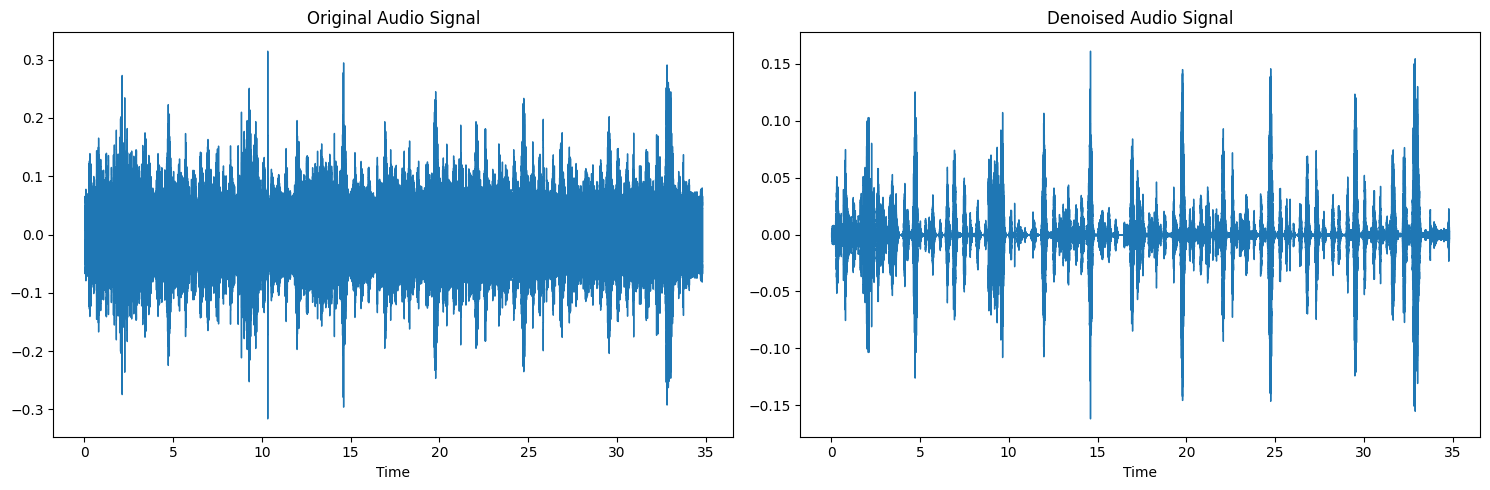

In [3]:

audio_data, sample_rate = librosa.load(path='./data/Voice of Birds/Bearded Guan_sound/Bearded Guan2.mp3')

denoised_audio = nr.reduce_noise(y=audio_data, sr=sample_rate)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  
librosa.display.waveshow(y=audio_data, sr=sample_rate)
plt.title('Original Audio Signal')


plt.subplot(1, 2, 2)
librosa.display.waveshow(y=denoised_audio, sr=sample_rate)
plt.title('Denoised Audio Signal')

plt.tight_layout()  
plt.show()

ipd.Audio(data=denoised_audio, rate=sample_rate)

In [4]:
directory = './data/Voice of Birds'

extracted_features = []

# Count the total number of files
total_files = sum(len(files) for _, _, files in os.walk(directory))

# Initialize tqdm with the total number of files
with tqdm(total=total_files, desc='Processing files') as pbar:

  for target_class in os.listdir(directory):                               # List of All Target Folder Names in Directory

      target_class_path = os.path.join(directory, target_class)            # Make a Target Folder Path in Directory

      for audio_file in os.listdir(target_class_path):                     # List of All Audio Files in Target Folder

          audio_path = os.path.join(directory, target_class, audio_file)   # Make a Audio File Path from Target Folder in Directory

          features = audio_to_tensors(audio_path)                          # Extract the Features from the Audio File

          extracted_features.append([features, target_class])              # Append the Features and Target_Class in List

          pbar.update(1)                                                   # Update the progress bar for each file processed


Processing files: 100%|██████████| 2161/2161 [10:35<00:00,  3.40it/s] 


In [5]:
features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
features_df

,features,class
0,"(tf.Tensor(-302.7308, shape=(), dtype=float32)...",Andean Guan_sound
1,"(tf.Tensor(-288.51892, shape=(), dtype=float32...",Andean Guan_sound
2,"(tf.Tensor(-309.88, shape=(), dtype=float32), ...",Andean Guan_sound
3,"(tf.Tensor(-149.14818, shape=(), dtype=float32...",Andean Guan_sound
4,"(tf.Tensor(-204.62337, shape=(), dtype=float32...",Andean Guan_sound
...,...,...
2156,"(tf.Tensor(-171.642, shape=(), dtype=float32),...",Yellow-legged Tinamou_sound
2157,"(tf.Tensor(-171.642, shape=(), dtype=float32),...",Yellow-legged Tinamou_sound
2158,"(tf.Tensor(-273.93494, shape=(), dtype=float32...",Yellow-legged Tinamou_sound
2159,"(tf.Tensor(-273.93494, shape=(), dtype=float32...",Yellow-legged Tinamou_sound


In [6]:
target_encoding = LabelEncoder().fit_transform(features_df['class'])
target_encoding

array([  0,   0,   0, ..., 113, 113, 113])

In [7]:
features_df['target'] = target_encoding.tolist()
features_df

,features,class,target
0,"(tf.Tensor(-302.7308, shape=(), dtype=float32)...",Andean Guan_sound,0
1,"(tf.Tensor(-288.51892, shape=(), dtype=float32...",Andean Guan_sound,0
2,"(tf.Tensor(-309.88, shape=(), dtype=float32), ...",Andean Guan_sound,0
3,"(tf.Tensor(-149.14818, shape=(), dtype=float32...",Andean Guan_sound,0
4,"(tf.Tensor(-204.62337, shape=(), dtype=float32...",Andean Guan_sound,0
...,...,...,...
2156,"(tf.Tensor(-171.642, shape=(), dtype=float32),...",Yellow-legged Tinamou_sound,113
2157,"(tf.Tensor(-171.642, shape=(), dtype=float32),...",Yellow-legged Tinamou_sound,113
2158,"(tf.Tensor(-273.93494, shape=(), dtype=float32...",Yellow-legged Tinamou_sound,113
2159,"(tf.Tensor(-273.93494, shape=(), dtype=float32...",Yellow-legged Tinamou_sound,113


In [8]:
prediction_dict = features_df.set_index('target')['class'].to_dict()
prediction_dict

{0: 'Andean Guan_sound',
 1: 'Andean Tinamou_sound',
 2: 'Australian Brushturkey_sound',
 3: 'Band-tailed Guan_sound',
 4: 'Barred Tinamou_sound',
 5: 'Bartletts Tinamou_sound',
 6: 'Baudo Guan_sound',
 7: 'Bearded Guan_sound',
 8: 'Berlepschs Tinamou_sound',
 9: 'Biak Scrubfowl_sound',
 10: 'Black Tinamou_sound',
 11: 'Black-billed Brushturkey_sound',
 12: 'Black-capped Tinamou_sound',
 13: 'Black-fronted Piping Guan_sound',
 14: 'Blue-throated Piping Guan_sound',
 15: 'Brazilian Tinamou_sound',
 16: 'Brown Tinamou_sound',
 17: 'Brushland Tinamou_sound',
 18: 'Buff-browed Chachalaca_sound',
 19: 'Cauca Guan_sound',
 20: 'Chaco Chachalaca_sound',
 21: 'Chestnut-bellied Guan_sound',
 22: 'Chestnut-headed Chachalaca_sound',
 23: 'Chestnut-winged Chachalaca_sound',
 24: 'Chilean Tinamou_sound',
 25: 'Choco Tinamou_sound',
 26: 'Cinereous Tinamou_sound',
 27: 'Collared Brushturkey_sound',
 28: 'Colombian Chachalaca_sound',
 29: 'Common Ostrich_sound',
 30: 'Crested Guan_sound',
 31: 'Curve

In [9]:
with open(file='./prediction.json', mode='w') as f:
    json.dump(prediction_dict, f)

with open(file='./prediction.json', mode='r') as f:
    prediction_dict = json.load(f)

prediction_dict

{'0': 'Andean Guan_sound',
 '1': 'Andean Tinamou_sound',
 '2': 'Australian Brushturkey_sound',
 '3': 'Band-tailed Guan_sound',
 '4': 'Barred Tinamou_sound',
 '5': 'Bartletts Tinamou_sound',
 '6': 'Baudo Guan_sound',
 '7': 'Bearded Guan_sound',
 '8': 'Berlepschs Tinamou_sound',
 '9': 'Biak Scrubfowl_sound',
 '10': 'Black Tinamou_sound',
 '11': 'Black-billed Brushturkey_sound',
 '12': 'Black-capped Tinamou_sound',
 '13': 'Black-fronted Piping Guan_sound',
 '14': 'Blue-throated Piping Guan_sound',
 '15': 'Brazilian Tinamou_sound',
 '16': 'Brown Tinamou_sound',
 '17': 'Brushland Tinamou_sound',
 '18': 'Buff-browed Chachalaca_sound',
 '19': 'Cauca Guan_sound',
 '20': 'Chaco Chachalaca_sound',
 '21': 'Chestnut-bellied Guan_sound',
 '22': 'Chestnut-headed Chachalaca_sound',
 '23': 'Chestnut-winged Chachalaca_sound',
 '24': 'Chilean Tinamou_sound',
 '25': 'Choco Tinamou_sound',
 '26': 'Cinereous Tinamou_sound',
 '27': 'Collared Brushturkey_sound',
 '28': 'Colombian Chachalaca_sound',
 '29': 'C

In [10]:
features = features_df['features'].tolist()
features

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-302.7308    ,   70.47813   ,   13.989463  ,   28.275862  ,
           9.768283  ,    7.4185357 ,    3.6636062 ,   12.622561  ,
           0.91524106,    3.15177   ,    4.532145  ,    6.7180843 ,
          -2.0768955 ,    5.589432  ,    3.0978472 ,    1.879621  ,
          -0.49635008,    6.4944406 ,    2.0897272 ,    4.146482  ,
           2.351528  ,    7.5341434 ,    0.63787717,    5.842799  ,
           4.5193014 ,    5.587803  ,    1.6145756 ,    6.687456  ,
           2.1035838 ,    4.21776   ,    2.5508912 ,    4.6314435 ,
           0.40562937,    4.0922813 ,    1.5406471 ,    3.7211802 ,
           0.517326  ,    3.6272905 ,    0.56133205,    3.100785  ],
       dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-2.8851892e+02,  7.3875404e+01, -6.4231918e+01, -2.0869183e+01,
        -8.9157705e+00,  5.8880253e+00,  5.2031320e-01, -4.9954062e+00,
        -9.6936216e+00,  2.7154510e+00, -8.0318183e-01,

In [11]:
target = features_df['target'].tolist()
print(target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 1

In [12]:
features_tensor = tf.convert_to_tensor(features)
features_tensor

<tf.Tensor: shape=(2161, 40), dtype=float32, numpy=
array([[-3.0273080e+02,  7.0478127e+01,  1.3989463e+01, ...,
         3.6272905e+00,  5.6133205e-01,  3.1007850e+00],
       [-2.8851892e+02,  7.3875404e+01, -6.4231918e+01, ...,
         1.4791442e+00, -1.4696556e+00,  2.0787075e+00],
       [-3.0988000e+02,  1.0401820e+01, -9.0290489e+01, ...,
        -1.6754006e-01, -1.6882226e+00,  1.8219033e+00],
       ...,
       [-2.7393494e+02, -4.8611638e-01, -5.3202702e+01, ...,
         2.5225978e+00,  7.4212205e-01,  4.8195281e+00],
       [-2.7393494e+02, -4.8611638e-01, -5.3202702e+01, ...,
         2.5225978e+00,  7.4212205e-01,  4.8195281e+00],
       [-2.7393494e+02, -4.8611638e-01, -5.3202702e+01, ...,
         2.5225978e+00,  7.4212205e-01,  4.8195281e+00]], dtype=float32)>

In [13]:
target_tensor = tf.convert_to_tensor(target)
target_tensor

<tf.Tensor: shape=(2161,), dtype=int32, numpy=array([  0,   0,   0, ..., 113, 113, 113], dtype=int32)>

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
batch_size = 32
dataset = dataset.batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 68
    train_batch_count = int(dataset_batch_count * train_size)                           # int(68*0.8) ---> 54 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(68*0.1) ---> 6 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 54 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 14 Batches ---> Next 6 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 8 Batches are Testing

    return train_ds, validation_ds, test_ds

In [16]:
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

(40,)
[-3.7940656e+02  1.4058192e+01  4.0000656e+01 -1.8995647e+01
  1.0428015e+01  9.0284462e+00 -1.2810915e+01  1.1003420e+01
 -9.5369511e+00  1.2754792e+01 -6.2467389e+00 -2.9467709e+00
  2.3595712e+00  2.6137831e+00  6.6984081e-01 -3.8472872e+00
 -1.2181014e+00  6.0586014e+00 -2.6271136e+00  2.7624907e+00
 -1.0246054e+01  9.6754217e+00 -3.9887555e+00  1.5934643e+00
 -3.9754338e+00 -1.0816447e-01  3.6260548e+00 -1.7499186e+00
 -2.3232379e+00 -7.4970359e-01  2.1123035e+00  1.4045980e+00
 -4.5080543e+00  2.0843618e-02 -1.0272621e+00  4.6943870e+00
 -5.3735762e+00  1.7813011e+00 -3.9633098e+00  5.4102168e+00]

(32,)
26



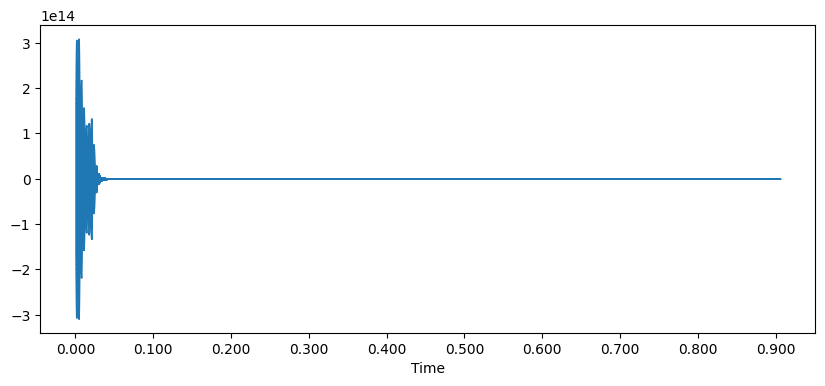

In [17]:
for audio_batch, label_batch in train_ds.take(1):
    print(audio_batch.numpy()[0].shape)
    print(audio_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    audio = librosa.feature.inverse.mfcc_to_audio(audio_batch.numpy())

    # Plot the reconstructed audio waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio)
    plt.show()

In [18]:
# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [19]:
mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 114          # Output Classes

input_shape = (mfcc_features, channel)
input_shape

(40, 1)

In [20]:
model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=input_shape),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

<Sequential name=sequential, built=True>

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 38, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 9, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 7, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 114)            │        58,482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,144,434 (4.37 MB)

 Trainable params: 1,143,154 (4.36 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [22]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=700,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.0195 - loss: 17.4603 - val_accuracy: 0.0000e+00 - val_loss: 16.5810
Epoch 2/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.0137 - loss: 17.2211 - val_accuracy: 0.0000e+00 - val_loss: 16.5554
Epoch 3/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.0257 - loss: 17.0043 - val_accuracy: 0.0000e+00 - val_loss: 16.5150
Epoch 4/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.0184 - loss: 16.8598 - val_accuracy: 0.0052 - val_loss: 16.4598
Epoch 5/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0314 - loss: 16.7233 - val_accuracy: 0.0625 - val_loss: 16.3953
Epoch 6/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.0477 - loss: 16.5421 - val_accuracy: 0.0677 - val_loss: 16.3342
Epoch 7/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.0429 - loss: 16.3534 - val_accuracy: 0.1198 - val_loss: 16.2602
Epoch 8/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.0550 - loss

In [24]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7882 - loss: 3.2109


[2.981410026550293, 0.78515625]

In [25]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

len(acc), len(val_acc), len(loss), len(val_loss)

(700, 700, 700, 700)

In [ ]:
model.save(',/modeltester.keras')

Text(0.5, 1.0, 'Training vs Validation Loss')

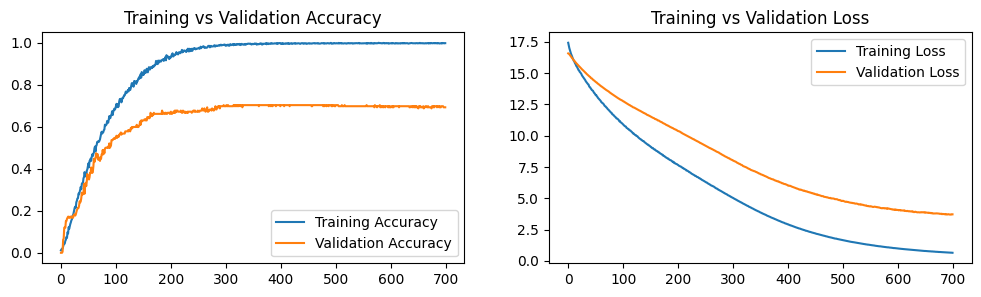

In [26]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

Test Model

In [27]:
def prediction(audio_file):

    # Load the Prediction JSON File to Predict Target_Label
    with open('./prediction.json', mode='r') as f:
        prediction_dict = json.load(f)

    # Extract the Audio_Signal and Sample_Rate from Input Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Reshape MFCC features to match the expected input shape for Conv1D both batch & feature dimension
    mfccs_features = np.expand_dims(mfccs_features, axis=0)
    mfccs_features = np.expand_dims(mfccs_features, axis=2)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    # Load the Model and Prediction
    model = tf.keras.models.load_model('./model.h5')
    prediction = model.predict(mfccs_tensors)

    # Find the Maximum Probability Value
    target_label = np.argmax(prediction)

    # Find the Target_Label Name using Prediction_dict
    predicted_class = prediction_dict[str(target_label)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')

In [28]:
prediction('./Sample_Audio/Andean Guan15.mp3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Predicted Class : Andean Guan_sound
Confident : 75.87999725341797%


In [29]:
prediction('./Sample_Audio/Cinereous Tinamou30.mp3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Predicted Class : Cinereous Tinamou_sound
Confident : 42.189998626708984%


In [30]:
prediction('./Sample_Audio/Grey Tinamou15.mp3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted Class : Grey Tinamou_sound
Confident : 50.470001220703125%
